In [2]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.2 MB/s  0:00:01m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.6 MB/s  0:00:00 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


Load both CSVs in a notebook

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/Users/azka/Downloads/Java/exports"

static_path      = os.path.join(BASE, "results_static.csv")
predictive_path  = os.path.join(BASE, "results_predictive.csv")
reactive_path    = os.path.join(BASE, "results_reactive.csv")

df_static     = pd.read_csv(static_path)
df_predictive = pd.read_csv(predictive_path)
df_reactive   = pd.read_csv(reactive_path)

print("static:", df_static.shape)
print("predictive:", df_predictive.shape)
print("reactive:", df_reactive.shape)

df_static.head(), df_predictive.head(), df_reactive.head()


static: (4, 5)
predictive: (4, 5)
reactive: (5, 4)


(     time  slot  vm_id  pred_cpu  vm_count
 0    0.10     0      1      -1.0         2
 1   10.10    10      1      -1.0         2
 2  100.00   100      1      -1.0         2
 3  100.11   100      1      -1.0         2,
      time  slot  vm_id  pred_cpu  vm_count
 0    0.10     0      1   15.8108         2
 1   10.10    10      1    6.5011         1
 2  100.00   100      1    0.8901         1
 3  100.11   100      1    0.8901         1,
      time  slot  avg_cpu_percent  vm_count
 0    0.10     0         100.0000         2
 1   10.10    10          66.6667         3
 2   10.20    10          66.6667         3
 3  100.00   100          66.6667         3
 4  100.11   100           0.0000         3)

Plot VM count over time (static vs predictive)

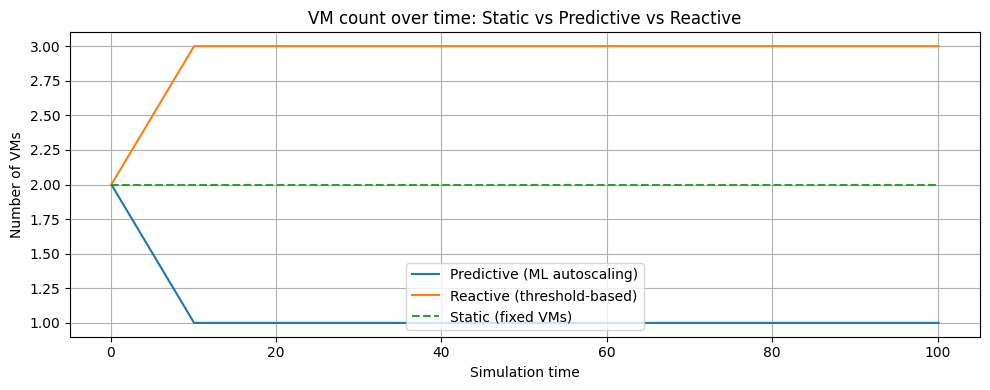

In [2]:
# For nice plotting, aggregate by time (in case of duplicates)
s = df_static.groupby("time", as_index=False)["vm_count"].mean()
p = df_predictive.groupby("time", as_index=False)["vm_count"].mean()
r = df_reactive.groupby("time", as_index=False)["vm_count"].mean()

plt.figure(figsize=(10,4))

plt.plot(p["time"], p["vm_count"], label="Predictive (ML autoscaling)")
plt.plot(r["time"], r["vm_count"], label="Reactive (threshold-based)")
plt.plot(s["time"], s["vm_count"], "--", label="Static (fixed VMs)")

plt.xlabel("Simulation time")
plt.ylabel("Number of VMs")
plt.title("VM count over time: Static vs Predictive vs Reactive")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
def summarize_vm(df, policy_name):
    return {
        "policy": policy_name,
        "avg_vm_count": df["vm_count"].mean(),
        "min_vm_count": df["vm_count"].min(),
        "max_vm_count": df["vm_count"].max(),
        "num_samples": len(df),
    }

summary = pd.DataFrame([
    summarize_vm(df_static, "static"),
    summarize_vm(df_predictive, "predictive"),
    summarize_vm(df_reactive, "reactive"),
])

summary


,policy,avg_vm_count,min_vm_count,max_vm_count,num_samples
0,static,2.00,2,2,4
1,predictive,1.25,1,2,4
2,reactive,2.80,2,3,5
